In [17]:
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score

In [9]:
def read_ground_truth(sample_id):
    truth = pd.read_csv(f'sample_with_true_source_{sample_id}.csv')
    return truth

def read_prediction(sample_id):
    pred = pd.read_csv(f'sample_{sample_id}.csv')[['index', 'prediction']]
    return pred

def merge_truth_and_pred(truth, pred):
    return truth.merge(pred, on='index')

In [15]:
truth = read_ground_truth(1)
pred = read_prediction(1)
result = merge_truth_and_pred(truth, pred)
result

,index,concept_id,feature,name,source,prediction
0,0,flask,is used to travel,gpt_3_filtered,gpt,gpt
1,1,wasp,has big eyes,cslb,human,gpt
2,2,coat_rack,has a top,gpt_3_filtered,gpt,gpt
3,3,tent,has a pole,gpt_3_unfiltered,gpt,gpt


In [18]:
for source in ['human', 'gpt']:
    result_source = result[result['source'] == source]
    precision = accuracy_score(result_source['source'], result_source['prediction'])
    print(precision)

0.0
1.0


<AxesSubplot:>

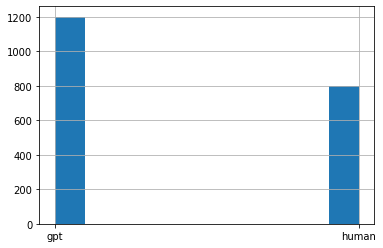

In [13]:
truth['source'].hist()